In [41]:
import os, logging, gensim
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib import cm
import gensim
from scipy.signal import savgol_filter

# Dimension Selection 

In [3]:
sim_model_origin = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_230119/Normalized_random_walk.npy')
sim_origin_fr = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_140219_all/Normalized_random_walk.npy')

In [4]:
pca = PCA(n_components=8000, svd_solver='randomized')
pca_sim_o = pca.fit(sim_model_origin)
var_cum = np.cumsum(pca_sim_o.explained_variance_ratio_)

In [5]:
pca_fr = PCA(n_components=8000, svd_solver='randomized')
pca_sim_o_fr = pca_fr.fit(sim_origin_fr)
var_cum_fr = np.cumsum(pca_sim_o_fr.explained_variance_ratio_)

In [12]:
np.save('pca_sim_fr_all.npy', pca_sim_o_fr)

In [13]:
np.save('pca_sim_en_all.npy', pca_sim_o)

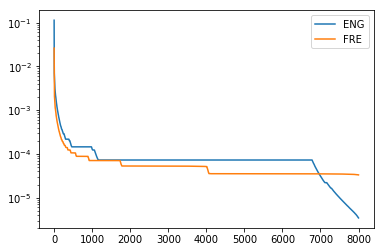

In [6]:
plt.yscale('log')
#plt.plot(var_cum)
plt.plot(pca_sim_o.explained_variance_ratio_, label='ENG')
plt.plot(pca_sim_o_fr.explained_variance_ratio_, label='FRE')
plt.legend()
plt.show()

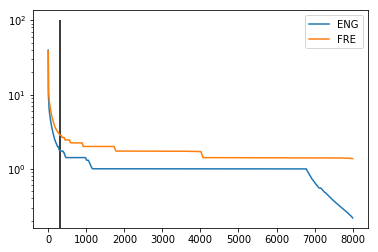

In [28]:
plt.yscale('log')
#plt.plot(var_cum)
plt.plot(pca_sim_o.singular_values_, label='ENG')
plt.plot(pca_sim_o_fr.singular_values_, label='FRE')
plt.vlines(x=300, ymax=100, ymin=0)
plt.legend()
plt.show()

In [80]:
# Word Alignment in two embeddings
file = open(sim_model_path, mode='r')
voc, dim = file.readline().split(' ')
voc = int(voc)
dim_sim = int(dim)

file_data = file.readlines()
file.close()

vocabulary = dict()
idx = 0
sim_model = np.zeros((voc, dim_sim), dtype=np.float32)
word_list = []

for line in file_data:
    vector = line.split(' ')
    word_list.append(vector[0])
    vocabulary[vector[0]] = idx
    sim_model[idx,:] = vector[1:]
    idx += 1

In [195]:
pca_sim_o = np.load('./pca_sim_en_all.npy')

In [203]:
pca_sim_o = pca_sim_o.item()

/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


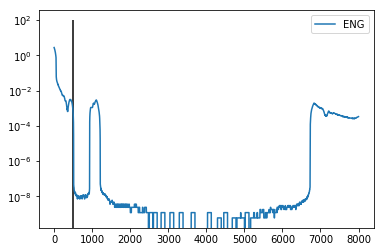

In [205]:
en_eig_dif = np.array(pca_sim_o.singular_values_)
en_eig_dif[1:] = en_eig_dif[:-1] - en_eig_dif[1:]
yhat = savgol_filter(en_eig_dif, 101, 1)
plt.yscale('log')
#plt.plot(var_cum)
plt.plot(yhat, label='ENG')
plt.vlines(x=500, ymax=100, ymin=0)
plt.legend()
plt.show()

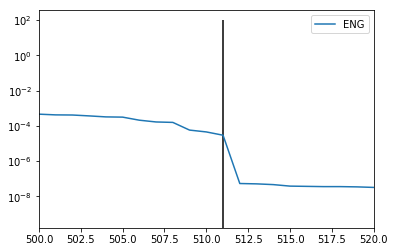

In [206]:
dim_sim_eng = 511
plt.yscale('log')
#plt.plot(var_cum)
plt.plot(yhat, label='ENG')
plt.vlines(x=dim_sim_eng, ymax=100, ymin=0)
plt.xlim(500,520)
plt.legend()
plt.show()

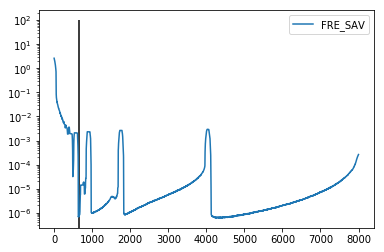

In [96]:
fr_eig_dif = np.array(pca_sim_o_fr.singular_values_)
fr_eig_dif[1:] = fr_eig_dif[:-1] - fr_eig_dif[1:]
fr_eig_dif_smoothed = (fr_eig_dif[:-3] + fr_eig_dif[1:-2] + fr_eig_dif[2:-1] + fr_eig_dif[3:])/4
yhat = savgol_filter(fr_eig_dif, 101, 1)
plt.yscale('log')
#plt.plot(var_cum)
# plt.plot(fr_eig_dif_smoothed, label='FRE')
plt.plot(yhat, label='FRE_SAV')
plt.vlines(x=650, ymax=100, ymin=0)
plt.legend()
plt.show()

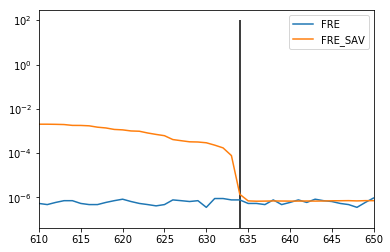

In [99]:
dim_sim_fre = 634
plt.yscale('log')
#plt.plot(var_cum)
plt.xlim(610,650)
plt.plot(fr_eig_dif_smoothed, label='FRE')
plt.plot(yhat, label='FRE_SAV')
plt.vlines(x=634, ymax=100, ymin=0)
plt.legend()
plt.show()

In [16]:
if lang == 'French':
    file = open(mix_model_path, mode='r', encoding="cp1252")
if lang == 'English':
    file = open(mix_model_path, mode='r')
file_data = file.readlines()
file.close()

In [23]:
voc, dim_mix = file_data[0].split()
if lang == 'English':
    mix_model = np.zeros((int(voc), int(dim_mix)), dtype=np.float32)
    vocabulary = []
    for line in file_data[1:]:
        vector = line.split(' ')
        mix_model[len(vocabulary),:] = vector[1:]
        vocabulary.append(vector[0])
        
        

In [26]:
#pca = PCA(n_components=300, svd_solver='randomized')
#pca_mix_o = pca.fit_transform(mix_model)


AttributeError: module 'pandas' has no attribute 'Dataframe'

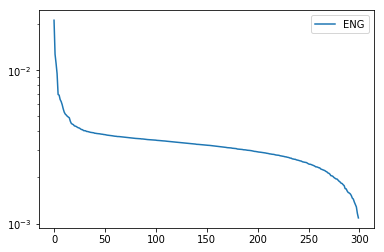

In [31]:
plt.yscale('log')
#plt.plot(var_cum)
plt.plot(pca.explained_variance_ratio_, label='ENG')
plt.legend()
plt.show()

# Generate Embeddings

In [154]:
# Global configuration
lang = 'English'
root_path = '/home/sying/Documents/Decorrelation/' + lang + '/'

if lang == 'French':
    sim_model_path = root_path + 'wolf_15k_850d.txt'
    mix_model_path = root_path + 'depglove_200d_eric.txt'
    asn_model_path = root_path + 'asn_embedding.txt'
    sig_model_path = root_path + 'sig_embedding.txt'
elif lang == 'English':
    sim_model_path = root_path + 'sim_embedding.txt'
    mix_model_path = root_path + 'glove_840B_300d.txt'
    asn_model_path = root_path + 'asn_embedding_511.txt'
    sig_model_path = root_path + 'sig_embedding_511.txt'


In [105]:
dim = dim_sim_eng
word_list = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_230119/word_list.npy')
pca_sim_o = pca_sim_o.fit_transform(sim_model_origin)
file = open(root_path + 'sim_15k_'+ str(dim) +'d.txt', mode='w+')
file.write(str(len(word_list)) + ' ' + str(dim) + '\n')
for idx, word in enumerate(word_list):
    file.write(word + ' ')
    file.write(' '.join(map(str, pca_sim_o[idx, :dim_sim_eng])))
    file.write('\n')
file.close()

In [109]:
ref_model = ["wordsim_rel.csv", "simlex999.csv"]

model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'sim_15k_'+ str(dim) +'d.txt', binary=False)
for ref in ref_model:
    print ("ref: %s---dim: %d---------------------"%(ref, dim))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/English_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])     
    # print("OOV", res[2])        

ref: wordsim_rel.csv---dim: 511---------------------
Pearson, r 0.027953538301716298 p 0.6626289849553657
Spearman, r 0.019334207436002393 p 0.7628587295076241
ref: simlex999.csv---dim: 511---------------------
Pearson, r 0.5060569631973371 p 5.995162912635793e-66
Spearman, r 0.49887683715274217 p 7.405558598896457e-64


In [110]:
# Global configuration
lang = 'French_POS'
root_path = '/home/sying/Documents/Decorrelation/' + lang + '/'


In [117]:
dim = dim_sim_fre
word_list = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_140219_all/word_list_FR_POS_ALL.npy')
pca_sim_o = pca_sim_o_fr.transform(sim_origin_fr)
file = open(root_path + 'sim_15k_'+ str(dim) +'d.txt', mode='w+')
file.write(str(len(word_list)) + ' ' + str(dim) + '\n')
for idx, word in enumerate(word_list):
    file.write(word + ' ')
    file.write(' '.join(map(str, pca_sim_o[idx, :dim])))
    file.write('\n')
file.close()

In [ ]:
ref_model = ["wordsim_rel.csv", "simlex999.csv"]

model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'sim_15k_'+ str(dim) +'d.txt', binary=False)
for ref in ref_model:
    print ("ref: %s---dim: %d---------------------"%(ref, dim))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/English_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])     
    # print("OOV", res[2])        

# Decorrelation

In [139]:
lang = 'English'
root_path = '/home/sying/Documents/Decorrelation/' + lang + '/'
dim = dim_sim_eng
word_list = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_230119/word_list.npy')
vocabulary = {value: idx for idx, value in enumerate(word_list)}

In [144]:
file = open(root_path + 'sim_15k_511d.txt', mode='r')
file_data = file.readlines()
file.close()
voc, dim = file_data[0].split()
sim_model = np.zeros((int(voc), int(dim)), dtype=np.float32)

In [146]:
for idx, line in enumerate(file_data[1:]):
    data = line.split()
    sim_model[idx, :] = data[1:] 

In [162]:
if lang == 'French':
    file = open(mix_model_path, mode='r', encoding="cp1252")
if lang == 'English':
    file = open(mix_model_path, mode='r')
file_data = file.readlines()
file.close()

In [179]:
word_list = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_230119/word_list.npy')

In [163]:
dim_mix_eng = int(file_data[0].split()[1])
mix_model = np.zeros((len(word_list), dim_mix_eng), dtype=np.float32)

In [164]:
for line in file_data[1:]:
    data = line.split()
    if data[0] in vocabulary:
        idx = vocabulary.pop(data[0])
        mix_model[idx, :] = data[1:]

In [165]:
vocabulary_mask = np.ones(int(voc), dtype=np.bool)
vocabulary_mask[list(vocabulary.values())] = 0

sim_model_red = sim_model[vocabulary_mask,:]
mix_model_red = mix_model[vocabulary_mask,:]

In [170]:
asn_model_red.shape

(8157, 300)

In [180]:
len(vocabulary_mask), len(word_list)

(15000, 15000)

In [174]:
np.array(word_list)[vocabulary_mask]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4385 but corresponding boolean dimension is 15000

In [181]:
# Linear Decorrelation by projecting A emb. onto B emb.
dim_mix = dim_mix_eng
reg = linear_model.LinearRegression()
reg.fit(sim_model_red, mix_model_red)
score = reg.score(sim_model_red, mix_model_red)
print("Model mapping score: ", score)

asn_model_red = mix_model_red - reg.predict(sim_model_red)
word_list = [word_list[i] for i in range(len(word_list)) if vocabulary_mask[i]]
file = open(asn_model_path, mode='w')
file.write('{} {}\n'.format(len(word_list), dim_mix))
asn_model_df = pd.DataFrame(asn_model_red, index=word_list)
file.write(asn_model_df.to_csv(sep=' ', header=False))
file.close()

file = open(sig_model_path, mode='w')
file.write('{} {}\n'.format(len(word_list), dim_mix))
sig_model_red = reg.predict(sim_model_red)
sig_model_df = pd.DataFrame(sig_model_red, index=word_list)
file.write(sig_model_df.to_csv(sep=' ', header=False))
file.close()


Model mapping score:  0.16618268456109642


# De correlation check

In [182]:
sig_model = pd.read_csv('./English/sig_embedding_511.txt', sep=' ', header=None, skiprows=1, index_col=0)

In [183]:
asn_model = pd.read_csv('./English/asn_embedding_511.txt', sep=' ', header=None, skiprows=1, index_col=0)

In [184]:
pca = PCA(n_components=300, svd_solver='randomized')
#pca_mix_o = pca.fit_transform(sig_model)

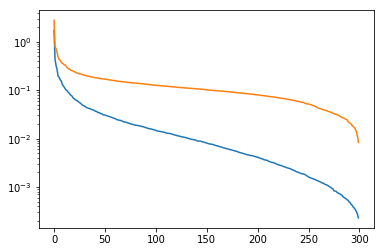

In [185]:
plt.yscale('log')
#plt.plot(pca.explained_variance_)
pca = PCA(n_components=300, svd_solver='full')
pca.fit(sig_model)
plt.plot(pca.explained_variance_)
pca = PCA(n_components=300, svd_solver='full')
pca.fit(asn_model)
plt.plot(pca.explained_variance_)

In [141]:
score_evo = {
    "wordsim_rel.csv": [],
    "simlex999.csv": []
}

In [187]:
ref_model = ["wordsim_rel.csv", "simlex999.csv"]
dim = 300

model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'sig_embedding_511.txt', binary=False)
for ref in ref_model:
    print ("ref: %s---dim: %d---------------------"%(ref, dim))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/English_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])     
    # score_evo[ref].append(res[1][0])
    # print("OOV", res[2])        

ref: wordsim_rel.csv---dim: 300---------------------
Pearson, r 0.18949474924783347 p 0.0028445584881911083
Spearman, r 0.14511719472311646 p 0.022813367126772895
ref: simlex999.csv---dim: 300---------------------
Pearson, r 0.48136123997514774 p 5.863737693616017e-59
Spearman, r 0.48918910654406567 p 4.111916841839331e-61


In [188]:
model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'asn_embedding_511.txt', binary=False)
for ref in ref_model:
    print ("ref: %s---dim: %d---------------------"%(ref, dim))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/English_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])     
    #score_evo[ref].append(res[1][0])
    # print("OOV", res[2])        

ref: wordsim_rel.csv---dim: 300---------------------
Pearson, r 0.5790335192055239 p 2.011894796738486e-23
Spearman, r 0.6038706304620574 p 7.773393094275475e-26
ref: simlex999.csv---dim: 300---------------------
Pearson, r 0.25266392489131945 p 5.509214351226265e-16
Spearman, r 0.253925714053347 p 3.9031256828536286e-16


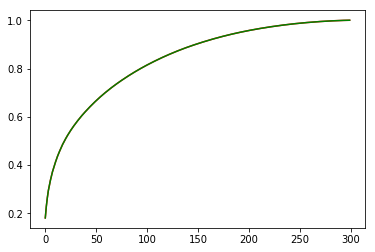

In [135]:
plt.plot(np.cumsum(pca_sig.explained_variance_ratio_), c='r')
plt.plot(np.cumsum(pca_asn.explained_variance_ratio_), c='g')
plt.show()